In [ ]:
%pip install scattertext
%pip install spacy_cld


In [ ]:
%pip install spacymoji
%pip install empath
%pip install spacy_langdetect

In [ ]:
%pip install matplotlib

In [ ]:
%pip install TextBlob stopwords 

0it [00:00, ?it/s]

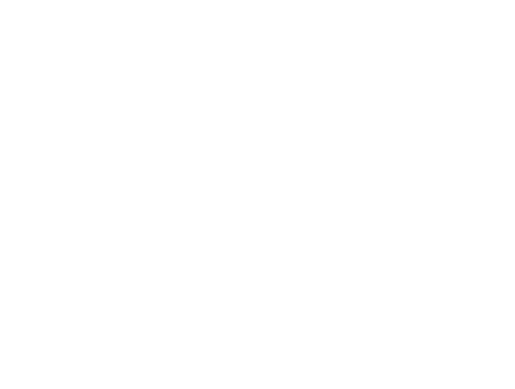

In [2]:
# library imports
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
width = 0.75
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.axis('off')
from nltk.corpus import stopwords
from textblob import TextBlob
import scattertext as st
import spacy
import spacy_cld

from IPython.display import IFrame
from IPython.display import display, HTML  
from collections import Counter
from tqdm import notebook as tqdm  # cool progress bars
tqdm.tqdm_notebook() # Enable tracking of progress in dataframe `apply` calls

In [3]:
tweets = pd.read_csv('twcs.csv',encoding='utf-8')
print(tweets.shape)
tweets.head()

(2811774, 7)


,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [4]:
first_inbound = tweets[pd.isnull(tweets.in_response_to_tweet_id) & tweets.inbound]

QnR = pd.merge(first_inbound, tweets, left_on='tweet_id', 
                                  right_on='in_response_to_tweet_id')

# Filter to only outbound replies (from companies)
QnR = QnR[QnR.inbound_y ^ True]
print(f'Data shape: {QnR.shape}')
QnR.head()

Data shape: (794299, 14)


,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,response_tweet_id_y,in_response_to_tweet_id_y
0,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
1,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,9,sprintcare,False,Tue Oct 31 21:46:14 +0000 2017,@115712 I would love the chance to review the ...,NaN,8.0
2,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,10,sprintcare,False,Tue Oct 31 21:45:59 +0000 2017,@115712 Hello! We never like our customers to ...,NaN,8.0
3,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,17,sprintcare,False,Tue Oct 31 19:59:13 +0000 2017,@115713 H there! We'd definitely like to work ...,16,18.0
4,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,19,sprintcare,False,Tue Oct 31 22:10:10 +0000 2017,@115715 Please send me a private message so th...,NaN,20.0


In [5]:
# removing anonymized screen names 
def sn_replace(match):
    _sn = match.group(2).lower()
    if not _sn.isnumeric():
        # This is a company screen name
        return match.group(1) + match.group(2)
    return ''

sn_re = re.compile('(\W@|^@)([a-zA-Z0-9_]+)')
print("Removing anonymized screen names in X...")
QnR["text_x"] = QnR.text_x.progress_apply(lambda txt: sn_re.sub(sn_replace, txt))
print("Removing anonymized screen names in Y...")
QnR["text_y"] = QnR.text_y.progress_apply(lambda txt: sn_re.sub(sn_replace, txt))

Removing anonymized screen names in X...


  0%|          | 0/794299 [00:00<?, ?it/s]

Removing anonymized screen names in Y...


  0%|          | 0/794299 [00:00<?, ?it/s]

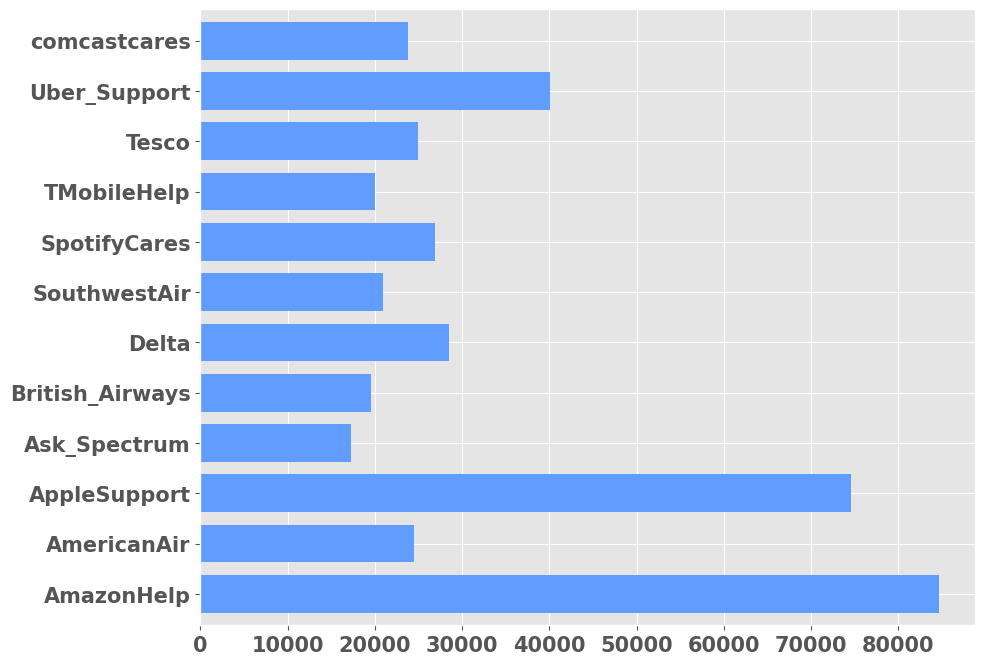

In [5]:
count = QnR.groupby("author_id_y")["text_x"].count()
c = count[count>15000].plot(kind='barh',figsize=(10, 8), color='#619CFF', zorder=2, width=width,)
c.set_ylabel('')
plt.show()

In [6]:
spacy.cli.download("en_core_web_sm")

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 26.9 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [6]:
nlp_cld = spacy.load('en_core_web_sm')

In [7]:
from spacy_langdetect import LanguageDetector
from spacy.language import Language

@Language.factory('cld_language_detector')
def language_detector(nlp, name):
    return spacy_cld.LanguageDetector()

In [8]:
language_detector = spacy_cld.LanguageDetector()

In [18]:
AppleQnR = QnR[QnR["author_id_y"]=="AppleSupport"]

In [17]:
doc = nlp_cld(AppleQnR.iloc[100]["text_x"])

print(doc)
print(doc._.languages)  
print(doc._.language_scores)

@AppleSupport I bought an iTunes gift card worth £15 a week ago, and the email still hasn’t come into my inbox to tell me the code. Helpppp
['en']
{'en': 0.99}


In [12]:
from tqdm import tqdm_notebook


mask = []
try:
    for i,doc in tqdm_notebook(enumerate(nlp_cld.pipe(AppleQnR["text_x"], batch_size=512))):
            if 'en' not in doc._.languages or len(doc._.languages) != 1:
                mask.append(False)
            else:
                mask.append(True)
except Exception:
    print("excepted ")

/tmp/ipykernel_141181/2306739620.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,doc in tqdm_notebook(enumerate(nlp_cld.pipe(AppleQnR["text_x"], batch_size=512))):


0it [00:00, ?it/s]

In [19]:
AppleQnR = AppleQnR[mask]
# sample a random fraction to visually ensure that we have only English tweets
AppleQnR.sample(frac=0.0002)   

,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,response_tweet_id_y,in_response_to_tweet_id_y
423953,1535707,476179,True,Fri Nov 03 20:03:32 +0000 2017,@AppleSupport why is the update changing simpl...,"1535706,1535708",NaN,1535706,AppleSupport,False,Sat Nov 04 00:24:00 +0000 2017,Let's look at this together. Please DM us. ht...,NaN,1535707.0
619561,2152165,416260,True,Sun Nov 26 04:24:53 +0000 2017,@AppleSupport If I trade in my iPhone with App...,2152164,NaN,2152164,AppleSupport,False,Sun Nov 26 13:16:00 +0000 2017,Let's see if we can help you in your region. ...,NaN,2152165.0
399403,1451542,456841,True,Thu Nov 02 16:01:44 +0000 2017,reclamação contra o IOS 11 da Apple @AppleSup...,1451541,NaN,1451541,AppleSupport,False,Thu Nov 02 17:44:28 +0000 2017,Since our Twitter support is available in Eng...,NaN,1451542.0
236666,874960,327725,True,Fri Oct 20 18:05:27 +0000 2017,Other than my battery being at 18% by 10AM I'm...,874959,NaN,874959,AppleSupport,False,Fri Oct 20 19:14:27 +0000 2017,We’re available to help with your battery lif...,874958,874960.0
754443,2593020,173634,True,Mon Nov 06 01:55:10 +0000 2017,Why does my iPhone change “I” to a box with a ...,2593019,NaN,2593019,AppleSupport,False,Mon Nov 06 03:31:55 +0000 2017,Here’s what you can do to work around the iss...,NaN,2593020.0
797679,2734463,366383,True,Mon Nov 20 19:11:24 +0000 2017,@applesupport at around 20-25% (6s running ios...,"2734464,2734462",NaN,2734462,AppleSupport,False,Mon Nov 20 19:33:00 +0000 2017,Thank you for reporting the problem to us. We...,NaN,2734463.0
151880,570943,254092,True,Sun Dec 03 03:41:57 +0000 2017,Why iOS is buggy? In Thailand we raise 12/2/1...,570942,NaN,570942,AppleSupport,False,Sun Dec 03 03:47:29 +0000 2017,We want to make sure your device is working. ...,NaN,570943.0
565229,1990448,589064,True,Thu Nov 02 14:23:04 +0000 2017,@AppleSupport Ever since I updated my alarm ne...,1990447,NaN,1990447,AppleSupport,False,Thu Nov 02 16:23:30 +0000 2017,"It's important for your alarms to go off, so ...",NaN,1990448.0
564095,1986897,588138,True,Thu Nov 02 03:36:16 +0000 2017,can you pls fix the letter I️ cause these sym...,"1986898,1986896",NaN,1986896,AppleSupport,False,Thu Nov 02 12:39:03 +0000 2017,"Hey, let's meet in DM and we can work togethe...",NaN,1986897.0
573036,2013893,595486,True,Mon Oct 30 19:01:56 +0000 2017,My phone clearly some shitttt why don’t I have...,2013892,NaN,2013892,AppleSupport,False,Mon Oct 30 19:11:30 +0000 2017,We'd like to help by better understanding wha...,2013889,2013893.0


In [14]:
AppleQnR.tail(10)["text_x"]

875031    Before installing iOS 11 on my iPhone, I could...
875032    Travelled over an hour to Store to get repairs...
875065    @AppleSupport pretty much all of my photos hav...
875102    What does this mean please @AppleSupport ‘cann...
875103    @AppleSupport why is my iPhone 7 constantly se...
875110    anyone having issues with #osx #HighSierra and...
875147    Hey @AppleSupport - not being able to duplicat...
875148    Yo @AppleSupport is that weird glitch w/ the c...
875171    What the fuck @AppleSupport  my phone keeps ha...
875199    Is anyone having #iphone issues with there pho...
Name: text_x, dtype: object

In [15]:
spacy.cli.download("en_core_web_lg")

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 4.7 MB/s eta 0:00:0000:0100:01


DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [78]:
from spacymoji import Emoji
@Language.factory('emoji3')
def language_detector(nlp, name):
    return Emoji(nlp)

In [121]:
nlp= spacy.load("en_core_web_lg")

emoji = Emoji(nlp)
nlp.add_pipe('emoji3', first=True)

In [120]:
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [110]:
emojis = []
for doc in tqdm_notebook(nlp.pipe(AppleQnR["text_x"], batch_size=512, disable=["tagger"])):
    if doc._.has_emoji:
        for e in doc._.emoji:
            emojis.extend(e[0])

/tmp/ipykernel_136795/803104660.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm_notebook(nlp.pipe(AppleQnR["text_x"], batch_size=512, disable=["tagger"])):


0it [00:00, ?it/s]

/home/i4624/.local/lib/python3.10/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


KeyboardInterrupt: 

In [ ]:
eCount = Counter(emojis)
eCount.most_common(20)

[('😡', 2561),
 ('🙄', 1288),
 ('️', 1128),
 ('😭', 827),
 ('🤔', 802),
 ('\u200d', 788),
 ('😒', 709),
 ('🤬', 690),
 ('😤', 684),
 ('😩', 559),
 ('🤦', 506),
 ('🏻', 491),
 ('🙃', 464),
 ('♀', 429),
 ('🏼', 395),
 ('🏽', 391),
 ('😑', 371),
 ('♂', 353),
 ('🏾', 276),
 ('👎', 256)]

In [172]:
QnR

,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,response_tweet_id_y,in_response_to_tweet_id_y
0,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,"Can you please send us a private message, so ...","5,7",8.0
1,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,9,sprintcare,False,Tue Oct 31 21:46:14 +0000 2017,I would love the chance to review the account...,NaN,8.0
2,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,10,sprintcare,False,Tue Oct 31 21:45:59 +0000 2017,Hello! We never like our customers to feel li...,NaN,8.0
3,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,y’all lie about your “great” connection. 5 ba...,17,NaN,17,sprintcare,False,Tue Oct 31 19:59:13 +0000 2017,H there! We'd definitely like to work with yo...,16,18.0
4,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"whenever I contact customer support, they tel...",19,NaN,19,sprintcare,False,Tue Oct 31 22:10:10 +0000 2017,Please send me a private message so that I ca...,NaN,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875287,2987942,823867,True,Wed Nov 22 07:30:39 +0000 2017,Hai @AirAsiaSupport #asking how many days need...,2987941,NaN,2987941,AirAsiaSupport,False,Wed Nov 22 07:55:05 +0000 2017,we have replied you via DM.Thanks-Emir,NaN,2987942.0
875288,2987944,823868,True,Wed Nov 22 07:43:36 +0000 2017,@AirAsiaSupport \n\nI am unable to do web chec...,2987943,NaN,2987943,AirAsiaSupport,False,Wed Nov 22 07:54:57 +0000 2017,"Sorry but kindly try to clear browser,cache,c...",NaN,2987944.0
875289,2987946,524544,True,Wed Nov 22 08:25:48 +0000 2017,@VirginTrains Hope you are well? Does the 9.30...,2987945,NaN,2987945,VirginTrains,False,Wed Nov 22 08:27:34 +0000 2017,That's a Peak service. The 09:56 is the first...,NaN,2987946.0
875290,2987948,823869,True,Wed Nov 22 08:35:16 +0000 2017,wtf!? I’ve been having really shitty service ...,2987947,NaN,2987947,sprintcare,False,Wed Nov 22 08:43:51 +0000 2017,"Hey, we'd be happy to look into this for you....",NaN,2987948.0


In [20]:
AppleSupport =QnR[(QnR["author_id_y"]=="AppleSupport")]
AppleSupport.head(4)

,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,response_tweet_id_y,in_response_to_tweet_id_y
119,714,115856,True,Tue Oct 31 22:19:32 +0000 2017,Hey @AppleSupport and anyone else who upgraded...,"712,715",NaN,712,AppleSupport,False,Tue Oct 31 22:26:29 +0000 2017,"Hey, let's work together to figure out what's...",713,714.0
120,719,115857,True,Tue Oct 31 22:01:50 +0000 2017,Tf is wrong with my keyboard,718,NaN,718,AppleSupport,False,Tue Oct 31 22:05:00 +0000 2017,"Fill us in on what is happening, then we can ...",717,719.0
121,723,115859,True,Tue Oct 31 22:11:16 +0000 2017,@AppleSupport hello are all the lines closed ...,722,NaN,722,AppleSupport,False,Tue Oct 31 22:17:30 +0000 2017,What's going on? We're hapy to help if we can...,721,723.0
122,730,115861,True,Tue Oct 31 20:46:35 +0000 2017,"Hello, internet. Can someone explain why this ...","729,731",NaN,729,AppleSupport,False,Tue Oct 31 20:55:34 +0000 2017,You're in the right place; we'll do all we ca...,728,730.0


In [173]:
AppleSupport

,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,response_tweet_id_y,in_response_to_tweet_id_y
119,714,115856,True,Tue Oct 31 22:19:32 +0000 2017,Hey @AppleSupport and anyone else who upgraded...,"712,715",NaN,712,AppleSupport,False,Tue Oct 31 22:26:29 +0000 2017,"Hey, let's work together to figure out what's...",713,714.0
120,719,115857,True,Tue Oct 31 22:01:50 +0000 2017,Tf is wrong with my keyboard,718,NaN,718,AppleSupport,False,Tue Oct 31 22:05:00 +0000 2017,"Fill us in on what is happening, then we can ...",717,719.0
121,723,115859,True,Tue Oct 31 22:11:16 +0000 2017,@AppleSupport hello are all the lines closed ...,722,NaN,722,AppleSupport,False,Tue Oct 31 22:17:30 +0000 2017,What's going on? We're hapy to help if we can...,721,723.0
122,730,115861,True,Tue Oct 31 20:46:35 +0000 2017,"Hello, internet. Can someone explain why this ...","729,731",NaN,729,AppleSupport,False,Tue Oct 31 20:55:34 +0000 2017,You're in the right place; we'll do all we ca...,728,730.0
123,733,115863,True,Tue Oct 31 22:16:40 +0000 2017,@AppleSupport I’ve got a screenshot saying my ...,732,NaN,732,AppleSupport,False,Tue Oct 31 22:22:31 +0000 2017,Go ahead and send us a DM please. Let us know...,NaN,733.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875110,2987501,823737,True,Wed Nov 22 00:48:54 +0000 2017,anyone having issues with #osx #HighSierra and...,2987499,NaN,2987499,AppleSupport,False,Wed Nov 22 01:02:29 +0000 2017,We're happy to help out with your concerns. T...,2987500,2987501.0
875147,2987605,689907,True,Wed Nov 22 02:11:43 +0000 2017,Hey @AppleSupport - not being able to duplicat...,2987604,NaN,2987604,AppleSupport,False,Wed Nov 22 02:33:58 +0000 2017,We're certainly glad to get you pointed in th...,NaN,2987605.0
875148,2987607,823765,True,Wed Nov 22 02:17:14 +0000 2017,Yo @AppleSupport is that weird glitch w/ the c...,2987606,NaN,2987606,AppleSupport,False,Wed Nov 22 02:29:26 +0000 2017,We'd love to help! Which device are you using...,NaN,2987607.0
875171,2987663,823779,True,Wed Nov 22 03:24:02 +0000 2017,What the fuck @AppleSupport my phone keeps ha...,2987662,NaN,2987662,AppleSupport,False,Wed Nov 22 03:27:30 +0000 2017,We'd like to help. Send us a DM and we can st...,NaN,2987663.0


In [21]:
import scattertext as st
from spacy.tokens import Doc

In [23]:
@Language.factory('language_detector')
def language_detector(nlp, name):
    return LanguageDetector()

['tok2vec', 'parser', 'attribute_ruler', 'lemmatizer']
['emoji3', 'tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
<bound method Language.get_pipe of <spacy.lang.en.English object at 0x7f641b9c5000>>


In [ ]:
AppleSupport

In [24]:
nlp = spacy.load('en_core_web_lg',exclude=['tagger', 'ner'])

nlp.add_pipe('language_detector')

In [25]:
print(nlp.pipe_names)

['tok2vec', 'parser', 'attribute_ruler', 'lemmatizer', 'language_detector']


In [26]:
AppleSupport['parsed'] = AppleSupport.text_y.progress_apply(nlp)

  0%|          | 0/74632 [00:00<?, ?it/s]

/home/i4624/.local/lib/python3.10/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
/tmp/ipykernel_141181/175807413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AppleSupport['parsed'] = AppleSupport.text_y.progress_apply(nlp)


In [59]:
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [27]:
AppleSupport['parsed'].head()

119    ( , Hey, ,, let, 's, work, together, to, figur...
120    ( , Fill, us, in, on, what, is, happening, ,, ...
121    ( , What, 's, going, on, ?, We, 're, hapy, to,...
122    ( , You, 're, in, the, right, place, ;, we, 'l...
123    ( , Go, ahead, and, send, us, a, DM, please, ....
Name: parsed, dtype: object

In [28]:
corpus = st.CorpusFromParsedDocuments(AppleSupport,
                             category_col='author_id_y',
                             parsed_col='parsed').build()

In [29]:
html = st.produce_scattertext_explorer(corpus,
          category='AppleSupport',
          category_name='AppleSupport',
          width_in_pixels=600,
          minimum_term_frequency=10,
          term_significance = st.LogOddsRatioUninformativeDirichletPrior(),
          )

In [30]:
# uncomment this cell to load the interactive scattertext visualisation
filename = "applesupport3.html"
open(filename, 'wb').write(html.encode('utf-8'))
IFrame(src=filename, width = 800, height=700)

In [31]:
feat_builder = st.FeatsFromOnlyEmpath()
empath_corpus = st.CorpusFromParsedDocuments(AppleSupport,
                                              category_col='author_id_y',
                                              feats_from_spacy_doc=feat_builder,
                                              parsed_col='parsed').build()

In [32]:
html = st.produce_scattertext_explorer(empath_corpus,
                                        category='AppleSupport',
                                        category_name='AppleSupport',
                                        width_in_pixels=700,
                                        metadata=AppleSupport['author_id_y'],
                                        use_non_text_features=True,
                                        use_full_doc=True,
                                        topic_model_term_lists=feat_builder.get_top_model_term_lists())


In [33]:
# uncomment this cell to load the interactive scattertext visualisation
filename = "empath-Apple2.html"
open(filename, 'wb').write(html.encode('utf-8'))
IFrame(src=filename, width = 900, height=700)